<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/bf_kruskital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 312, done.
remote: Counting objects: 100% (312/312), done.
remote: Compressing objects: 100% (307/307), done.
remote: Total 312 (delta 182), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (312/312), 291.43 KiB | 4.78 MiB/s, done.
Resolving deltas: 100% (182/182), done.


In [2]:
from algorithmic_complexity.aclib.ds import DisjointSet
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx
from heapq import heappush as push, heappop as pop

In [3]:
def kruskital(G):
  n = G.number_of_nodes()
  ds = DisjointSet(n)
  edges = []
  for u, v in G.edges:
    w = G.edges[u, v]['weight']
    push(edges, (w, u, v))

  path = [-1]*n
  while edges and n > 0:
    _, u, v = pop(edges)
    if not ds.isSameSet(u, v):
      ds.union(u, v)
      if path[u] < 0:
        path[u] = v
      else:
        path[v] = u
      n -= 1

  return path

In [4]:
%%file 1.in
0 1 3
1 2 2
1 5 5
2 4 5
2 5 7
3 5 5
3 7 8
4 6 8
4 7 2

Writing 1.in


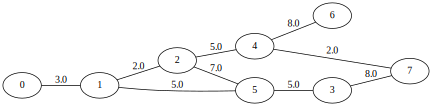

In [5]:
G = nx.read_weighted_edgelist('1.in', nodetype=int)
gs.nx2gv(G, weighted=True)

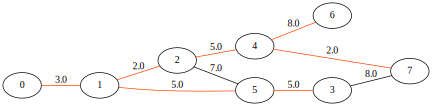

In [6]:
path = kruskital(G)
gs.nx2gv(G, weighted=True, path=path)